In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
df = pd.read_csv("C:/Users/enes_/Desktop/train.csv")

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [159]:
df.columns = ("YolcuNo", "Hayatta", "YolcuSinif", "isim", "Cinsiyet", "Yas", "Es/Kardes", "Ebeveyn/Cocuk", "Bilet", "Ucret", "Kabin", "BinisYeri")

In [9]:
df.head()

,YolcuNo,Hayatta,YolcuSinif,isim,Cinsiyet,Yas,Es/Kardes,Ebeveyn/Cocuk,Bilet,Ucret,Kabin,BinisYeri
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. İLK OLARAK EKSİK VERİ KONTROLÜ YAPIYORUM

In [160]:
df.isnull().sum()

YolcuNo            0
Hayatta            0
YolcuSinif         0
isim               0
Cinsiyet           0
Yas              177
Es/Kardes          0
Ebeveyn/Cocuk      0
Bilet              0
Ucret              0
Kabin            687
BinisYeri          2
dtype: int64

In [97]:
# Öncelikle Eksik veri içeren kolonların hiç bir işlem yapılmadan direkt düşürülmesini görelim;

df.drop(["Yas", "Kabin", "BinisYeri"], axis=1, inplace = False)
# Bu kodda inplace argümanını True yaptığınızda veri seti kalıcı olarak değişecektir.

,YolcuNo,Hayatta,YolcuSinif,isim,Cinsiyet,Es/Kardes,Ebeveyn/Cocuk,Bilet,Ucret
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [99]:
# Tüm eksik gözlem satırlarının silinmesi;
df.dropna()

,YolcuNo,Hayatta,YolcuSinif,isim,Cinsiyet,Yas,Es/Kardes,Ebeveyn/Cocuk,Bilet,Ucret,Kabin,BinisYeri
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [101]:
# Eksik veri içeren kolonları silmek her zaman isteyeceğimiz bir strateji olamaz.
# Eksik veriler eğer rastgele bir durumla (bilinçli şekilde boş bırakılmamış) oluşmuş ise eksik veriyi veya kolonu düşürebiliriz.
# Değişkendeki eksik veri sayıları kullanacağımız stratejiyi etkileyecek,
# Şimdi de eksik veri içeren kolonların tiplerini kontrol ediyorum;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YolcuNo        891 non-null    int64  
 1   Hayatta        891 non-null    int64  
 2   YolcuSinif     891 non-null    int64  
 3   isim           891 non-null    object 
 4   Cinsiyet       891 non-null    object 
 5   Yas            714 non-null    float64
 6   Es/Kardes      891 non-null    int64  
 7   Ebeveyn/Cocuk  891 non-null    int64  
 8   Bilet          891 non-null    object 
 9   Ucret          891 non-null    float64
 10  Kabin          204 non-null    object 
 11  BinisYeri      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# BinişYeri ve Kabin değişkenleri "object", Yaş değişkeni "float" olarak girilmiş bu nedenle iki duruma yaklaşımımız farklı olacak;

In [102]:
# Öncelikle eksik veriyi silmeye ya da doldurmaya karar vermek için görselleştirme yaklaşımını kullanacağım;

!pip install missingno
import missingno as msno



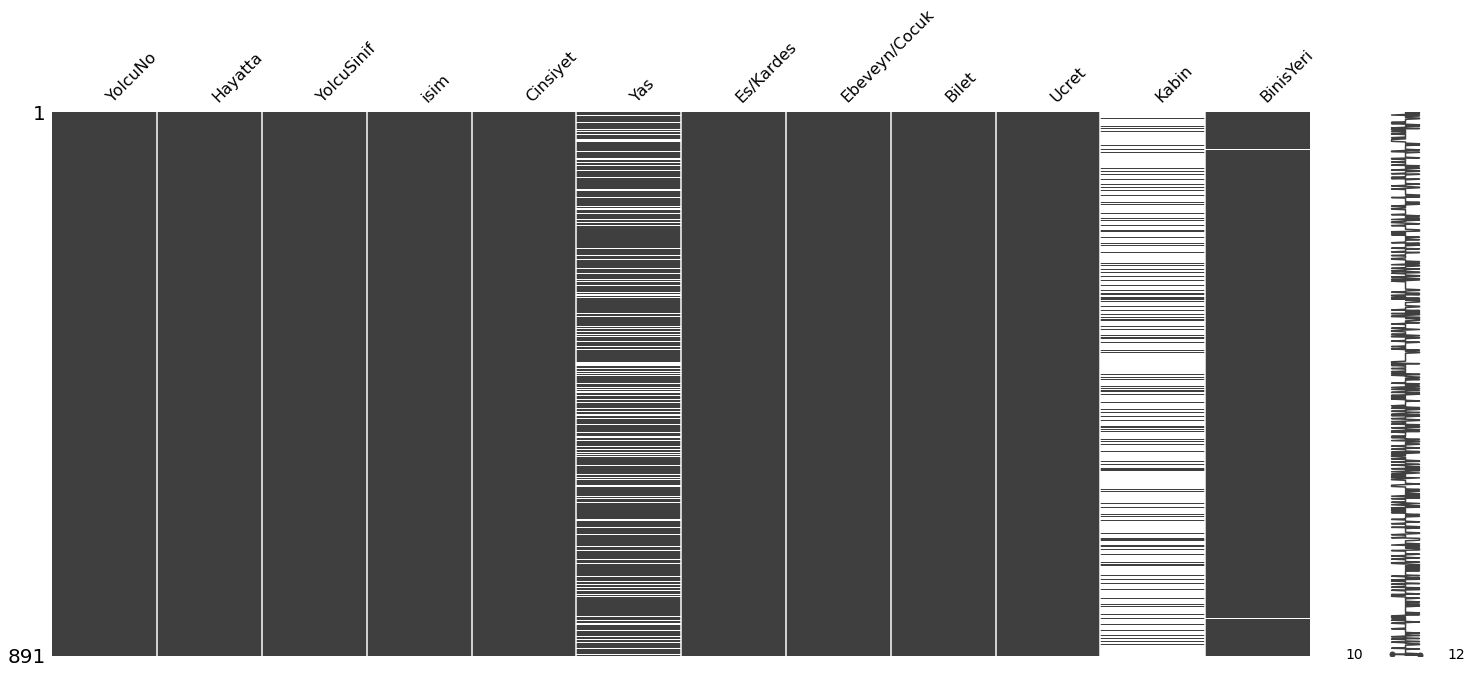

In [103]:
msno.matrix(df)

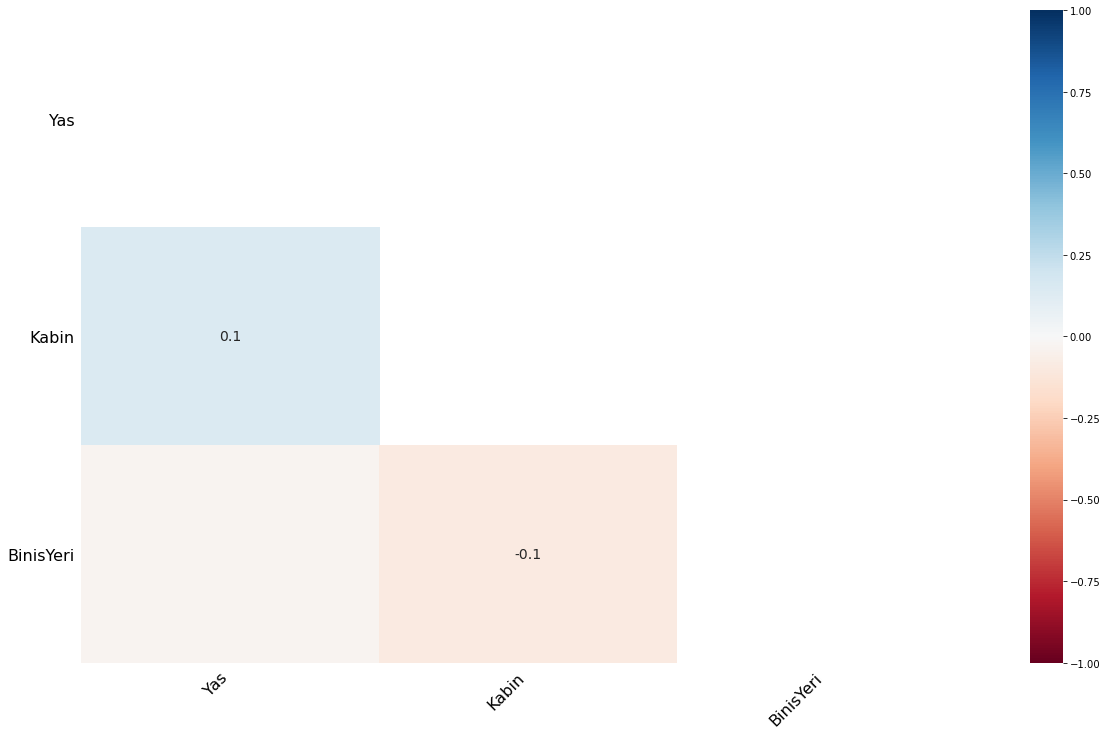

In [104]:
msno.heatmap(df);

In [ ]:
# Bu değerlendirmelerin ardından verideki eksik değerlerin raslantısal gerçekleştiğini görüyoruz. 
# Ancak başka veri setlerinde bu korelasyon yüksek çıkabilir ve biz böyle bir durumda eksik verileri düşüremeyiz.
# Biz şimdi yine de bu verilerin silinmemesi gerektiğini farz ederek doldurma yöntemlerini çalışalım;

## 1.1 EKSİK VERİLERİN DOLDURULMASI

In [161]:
# İstediğimiz her hangi bir değerle doldurma metodu;

df.Yas.fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Yas, Length: 891, dtype: float64

In [162]:
# Ortalama ile doldurma metodu; 

df.Yas.fillna(df.Yas.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Yas, Length: 891, dtype: float64

In [163]:
# Medyan ile doldurma metodu;

df.Yas.fillna(df.Yas.median())


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Yas, Length: 891, dtype: float64

In [164]:
# KNN algoritması ile eksik verilerin doldurulması

from sklearn.impute import KNNImputer

In [165]:
# KNN algoritmasının çalışabilmesi için sadece sayısal olan değişkenleri seçiyorum.

df_sayisal = df.select_dtypes(include = ["float64","int64"])
df_sayisal.head()

,YolcuNo,Hayatta,YolcuSinif,Yas,Es/Kardes,Ebeveyn/Cocuk,Ucret
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [166]:
df_sayisal.isnull().sum()

YolcuNo            0
Hayatta            0
YolcuSinif         0
Yas              177
Es/Kardes          0
Ebeveyn/Cocuk      0
Ucret              0
dtype: int64

In [167]:
#KNNImputer numpy arrayleriyle işlem yapıyor. O yüzden Pandas DataFrame'in kolonlarını bir yere kaydettem gerekiyor. 
#İşlemler sona erdiğinde tekrar kullanacağım.
Degiskenler = df_sayisal.columns

In [168]:
#Veri setimi array haline getiriyorum;
array_data = np.array(df_sayisal)

In [169]:
array_data[0:10]

array([[ 1.    ,  0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 2.    ,  1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 4.    ,  1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 5.    ,  0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 6.    ,  0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 7.    ,  0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 8.    ,  0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 9.    ,  1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [10.    ,  1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [170]:
imputer = KNNImputer(n_neighbors=4)
doldurulmus_data = imputer.fit_transform(array_data)

In [171]:
#Doldurulmuş Numpy Arrayini tekrar DataFrame haline getiriyorum;
yeni_df=pd.DataFrame(doldurulmus_data, columns=Degiskenler)


In [172]:
df[["Yas"]] = yeni_df.Yas

In [173]:
df.isnull().sum()

YolcuNo            0
Hayatta            0
YolcuSinif         0
isim               0
Cinsiyet           0
Yas                0
Es/Kardes          0
Ebeveyn/Cocuk      0
Bilet              0
Ucret              0
Kabin            687
BinisYeri          2
dtype: int64

# 1.1.1 kategorik değişkenin doldurulması

In [133]:
df.isnull().sum()

YolcuNo          0
Hayatta          0
YolcuSinif       0
isim             0
Cinsiyet         0
Yas              0
Es/Kardes        0
Ebeveyn/Cocuk    0
Bilet            0
Ucret            0
BinisYeri        0
dtype: int64

In [122]:
df.BinisYeri.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [123]:
df["BinisYeri"].mode()[0]

'S'

In [124]:
df["BinisYeri"].fillna(df["BinisYeri"].mode()[0], inplace=True)

In [125]:
df.isnull().sum()

YolcuNo            0
Hayatta            0
YolcuSinif         0
isim               0
Cinsiyet           0
Yas              177
Es/Kardes          0
Ebeveyn/Cocuk      0
Bilet              0
Ucret              0
Kabin            687
BinisYeri          0
dtype: int64

In [126]:
# deck kolonu çok fazla eksik değer içerdiği için doldurmaya çalışmak yerine direk kaldırıyorum.
del df["Kabin"]

In [134]:
df.isnull().sum()

YolcuNo          0
Hayatta          0
YolcuSinif       0
isim             0
Cinsiyet         0
Yas              0
Es/Kardes        0
Ebeveyn/Cocuk    0
Bilet            0
Ucret            0
BinisYeri        0
dtype: int64

# 2. AYKIRI DEĞER PROBLEMİ YÖNTEMLERİ

In [135]:
# Tek değişkende aykırı değer baskılama yöntemi;
df.Yas.sort_values()

803     0.42
755     0.67
469     0.75
644     0.75
78      0.83
       ...  
116    70.50
96     71.00
493    71.00
851    74.00
630    80.00
Name: Yas, Length: 891, dtype: float64

In [136]:
df_yas=df.Yas

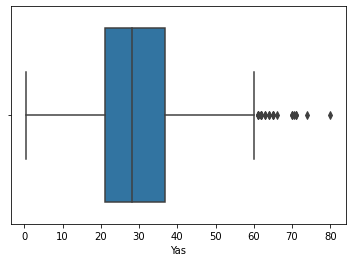

In [137]:
sns.boxplot(x=df_yas);

In [138]:
Q1 = df_yas.quantile(0.25)
Q3 = df_yas.quantile(0.75)
IQR = Q3-Q1

In [139]:
Q1

21.125

In [140]:
Q3

36.75

In [141]:
IQR

15.625

In [142]:
alt_sinir = Q1-1.5*IQR

In [143]:
ust_sinir = Q3+1.5*IQR

In [144]:
ust_sinir

60.1875

In [145]:
alt_sinir

-2.3125

In [60]:
aykiri_tf = (df_yas > ust_sinir)

In [61]:
aykiri_df = df_yas[aykiri_tf]

In [62]:
df_yas[aykiri_tf] = ust_sinir

C:\Users\enes_\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
df_yas[aykiri_tf]

33     64.8125
54     64.8125
96     64.8125
116    64.8125
280    64.8125
456    64.8125
493    64.8125
630    64.8125
672    64.8125
745    64.8125
851    64.8125
Name: Yas, dtype: float64

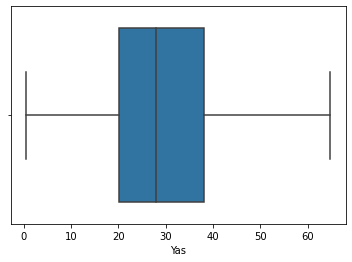

In [64]:
sns.boxplot(x=df_yas);

In [ ]:
# Benzer yaklaşım kullanılarak ortalama veya istenen bir değerle baskılama uygulanabilir.

# 3. LOF ÇOK DEĞİŞKENLİ AYKIRI DEĞER ANALİZİ

In [ ]:
# Aykırı değerler sadece tek değişkenler özelinde değerlendirilemez. 
# Örnek olarak; 15 yaş, yaş değişkeni olarak ve yıllık 100.000 dolar kazanç gelir olarak normal değerdirler.
# Ancak 15 yaşındaki birinin 100.000 dolar kazanması normal bir durum değildir.
# İşte bu yüzden değişkenlerin çok değişkenli olarak da incelenmesi gerekir.

In [ ]:
# Bu incelemeyi yapmamıza yardımcı olacak yöntemlerden birisi; LocalOutlierFactor
# Yukarıda eksik verileri doldurmak için KNN algoritamsını kullandık.
# Bu algoritma LOF'u anlamak için bize yardımcı olabilir.
# Temelde KNN bir noktayı bulmak için seçilen K değeri kadar komşunun mesafelerini hesaplar ve 
## elimizdeki nokta hangi gruba daha yakın ise tahminimizi o grub olarak yapar. 
# LOF ise aynı şekilde belirlenen K değeri kadar komşuların mesafesine bakararak gruba en uzak (aykırı) noktaları bulamaya çalışır.

In [146]:
# Öncelikle sayisal olan veri setimden eksik değerleri düşürüyorum. Çünkü Lof sadece bu şekilde çalışabiliyor.
df_ = df_sayisal.dropna()

In [147]:
from sklearn.neighbors import LocalOutlierFactor

In [148]:
clf = LocalOutlierFactor(n_neighbors = 10)

In [149]:
clf.fit_predict(df_)

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1, -1

In [150]:
#Sadece negatif değerleri alıyorum. Çünkü biz aykırı değerleri yakalamak istiyoruz, 
# burada negatif değerler gruptan uzaklıklarına göre en yüksek değeri alıyor.
df_scores = clf.negative_outlier_factor_

In [151]:
df_scores[0:10]

array([-1.03335693, -1.50527644, -0.98922529, -1.2042189 , -0.99412766,
       -1.24081082, -1.05724594, -0.97357928, -1.02199913, -1.02106017])

In [152]:
# Dağınık halde olan verileri sıralı hale getirerek en yüksek negatif değerleri kontrol ediyorum.

np.sort(df_scores)[0:30]

array([-3.82037108, -3.55297176, -3.15686612, -2.81331604, -2.72653282,
       -2.5749124 , -1.87124906, -1.86908647, -1.75838221, -1.72324339,
       -1.72217855, -1.70719164, -1.68021594, -1.67011141, -1.66077891,
       -1.6591533 , -1.65888908, -1.63181967, -1.60791023, -1.6060112 ,
       -1.57773536, -1.55319023, -1.54960903, -1.53770975, -1.53413211,
       -1.53079564, -1.51126768, -1.50746045, -1.50527644, -1.50437978])

In [153]:
# Keskin değişimin 15. değerde olduğunu göz yordamıyla fark ediyorum.

np.sort(df_scores)[15]

-1.659153295929956

In [154]:
esik_deger = np.sort(df_scores)[15]

In [155]:
aykiri_olmayan_tf = df_scores > esik_deger

In [156]:
aykiri_tf =  df_scores < esik_deger

In [157]:
df_[aykiri_olmayan_tf]

,YolcuNo,Hayatta,YolcuSinif,Yas,Es/Kardes,Ebeveyn/Cocuk,Ucret
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
889,890,1,1,26.0,0,0,30.0000


# 4. AYKIRI DEĞERLERE HASSAS OLMAYAN MODEL KURMAK MÜMKÜN MÜ?

Aykırı değerler kontrolü yapmak için veri setinden bir kolon seçiyorum;

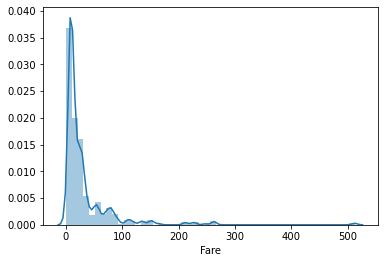

In [12]:
import seaborn as sns

sns.distplot(df.Fare)

In [29]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

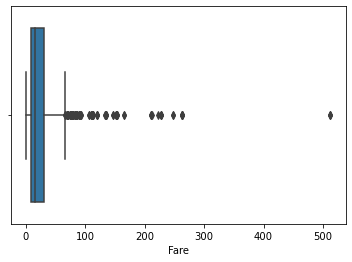

In [31]:
sns.boxplot(x = df.Fare);

 Titanic veri setinde bizim hedef değişkenimiz yolcuların "Hayatta" kalması olacaktır. 
0 ve 1 olarak iki değere sahip bu değişken için model kuracak olsak lojistik regresyonu tercih edebiliriz. 
Ancak lojistik regresyon aykırı değerlerden oldukça fazla etkilenebilmektedir. 
O sebeple modelin aykırı değerlerden etkilenmemesi için bir çok yöntem geliştirilmiştir. Bunlardan biri ;

# Ağırlıklandırılmış en çok olabilirlik tahmin edicisi (WMLE)

Adından da anlaşılabileceği gibi bu yöntemde, kullandığımız modele giren aykırı değerler tespit edilir ve ağırlıkları 0 a eşitlenir.
Bu sayede modeldeki etkisi yok edilmiş olur.

detaylı bilgi için; https://dspace.ankara.edu.tr/xmlui/bitstream/handle/20.500.12575/70075/605406.pdf?sequence=1&isAllowed=y